<h1> Data Preparation </h1>

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

<h2> Collecting data about cities </h2>

In [3]:
df=pd.read_html("https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Croatia", header=0)[0]
df.drop(axis=0, index=0, inplace=True)
df.rename(columns={"City / town": "City", "Town/City proper": "Population"}, inplace=True)
df=df[['City', 'County', 'Population']]

In [4]:
df['City']=df["City"].str.replace(" ¤", "")

In [5]:
df

City                       County Population
1                 Zagreb                       Zagreb     688163
2                  Split               Split-Dalmatia     167121
3                 Rijeka        Primorje-Gorski Kotar     128384
4                 Osijek               Osijek-Baranja      84104
5                  Zadar                 Zadar County      71471
6          Velika Gorica                Zagreb County      31553
7         Slavonski Brod                Brod-Posavina      53531
8              Pula/Pola                Istria County      57460
9               Karlovac              Karlovac County      46833
10                 Sisak              Sisak-Moslavina      33322
11              Varaždin              Varaždin County      38839
12               Šibenik                 Šibenik-Knin      34302
13             Dubrovnik            Dubrovnik-Neretva      28434
14              Bjelovar            Bjelovar-Bilogora      27024
15               Kaštela               Split-Dalmatia          —
16               Samobor                Zagreb County      15956
17              Vinkovci               Vukovar-Srijem      32029
18            Koprivnica          Koprivnica-Križevci      23955
19                Đakovo               Osijek-Baranja      19491
20               Vukovar               Vukovar-Srijem      26468
21               Čakovec                    Međimurje      15147
22                Požega              Požega-Slavonia      19506
23              Zaprešić                Zagreb County      19644
24                  Sinj               Split-Dalmatia      11478
25              Petrinja              Sisak-Moslavina      15683
26                 Solin               Split-Dalmatia      20212
27                Kutina              Sisak-Moslavina      13735
28            Virovitica  Virovitica-Podravina County      14688
29              Križevci          Koprivnica-Križevci      11231
30         Sveta Nedelja                Zagreb County       1338
31             Dugo Selo                Zagreb County      10453
32              Metković            Dubrovnik-Neretva      15329
33         Poreč/Parenzo                Istria County       9790
34                Našice               Osijek-Baranja       7888
35     Sveti Ivan Zelina                Zagreb County       2764
36          Jastrebarsko                Zagreb County       5493
37                  Knin                 Šibenik-Knin      10633
38                  Omiš               Split-Dalmatia       6462
39               Vrbovec                Zagreb County       4947
40           Ivanić-Grad                Zagreb County       9379
41        Rovinj/Rovigno                Istria County      13056
42         Nova Gradiška                Brod-Posavina      11821
43                Ogulin              Karlovac County       8216
44              Makarska               Split-Dalmatia      13426
45                Ivanec              Varaždin County       5234
46               Slatina  Virovitica-Podravina County      10208
47                Novska              Sisak-Moslavina       7028
48            Umag/Umago                Istria County       7281
49            Novi Marof              Varaždin County       1956
50                Trogir               Split-Dalmatia      10923
51                Gospić                    Lika-Senj       6575
52               Krapina              Krapina-Zagorje       4471
53               Županja               Vukovar-Srijem      12090
54              Popovača              Sisak-Moslavina       4207
55               Opatija        Primorje-Gorski Kotar       6657
56          Labin/Albona                Istria County       6893
57               Daruvar            Bjelovar-Bilogora       8567
58               Valpovo               Osijek-Baranja       7406
59            Pleternica              Požega-Slavonia       3418
60             Duga Resa              Karlovac County       6011
61            Crikvenica        Primorje-Gorski Kotar  

Function for geolocation data

In [7]:
def find_location(adr):
    address = adr+', Croatia'

    geolocator = Nominatim(user_agent="to_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude, longitude



Collecting latitude and longitude values for all cities

In [77]:


df_tmp=df

for i in range(0,3):
    tmp_list=[]
    for i in df_tmp['City']:
        print(i)
        try:
            res=find_location(i)
            tmp_list.append([i, res[0],res[1]])
            print(res)
        except:
            tmp_list.append([i,'Unknown', 'Unknown'])
            print('Unknown')

    df1=pd.DataFrame(tmp_list)
    for key, row in df1.iterrows():
        print(row[0])
        df.loc[df['City']==row[0],'Latitude']=row[1]
        df.loc[df['City']==row[0],'Longitude']=row[2]

    df_tmp=df[df['Latitude']=='Unknown']
df


Zagreb
(45.813177, 15.977048)
Split
(43.5073034, 16.4414229)
Rijeka
(45.3269357, 14.4409841)
Osijek
(45.5548893, 18.6954077)
Zadar
(44.1186078, 15.232136)
Velika Gorica
(45.715071, 16.0687477)
Slavonski Brod
(45.1656207, 18.0121303)
Pula/Pola
(44.8701965, 13.8455407)
Karlovac
(45.4892522, 15.5486303)
Sisak
(45.4888297, 16.3754816)
Varaždin
(46.308029, 16.3377904)
Šibenik
(43.7337065, 15.8964835)
Dubrovnik
(42.6499638, 18.0936953)
Bjelovar
(45.89867, 16.8422029)
Samobor
(45.8020312, 15.7109094)
Vinkovci
(45.2883204, 18.804708)
Koprivnica
(46.162944, 16.8319162)
Đakovo
(45.3096995, 18.4104939)
Vukovar
(45.3445429, 19.0021133)
Čakovec
(46.3877682, 16.4346835)
Požega
(45.331868, 17.6751099)
Zaprešić
(45.8574484, 15.8046812)
Sinj
(43.7015963, 16.6365238)
Petrinja
(45.4415284, 16.278763)
Solin
(43.5441591, 16.4919213)
Kutina
(45.4838493, 16.7761505)
Virovitica
(45.8331834, 17.3853058)
Križevci
(46.0229849, 16.5456976)
Sveta Nedelja
(45.7968594, 15.7776409)
Dugo Selo
(45.8060388, 16.237771)
M

index                 City                       County Population  \
0        1               Zagreb                       Zagreb     688163   
1        2                Split               Split-Dalmatia     167121   
2        3               Rijeka        Primorje-Gorski Kotar     128384   
3        4               Osijek               Osijek-Baranja      84104   
4        5                Zadar                 Zadar County      71471   
5        6        Velika Gorica                Zagreb County      31553   
6        7       Slavonski Brod                Brod-Posavina      53531   
7        8            Pula/Pola                Istria County      57460   
8        9             Karlovac              Karlovac County      46833   
9       10                Sisak              Sisak-Moslavina      33322   
10      11             Varaždin              Varaždin County      38839   
11      12              Šibenik                 Šibenik-Knin      34302   
12      13            Dubrovnik            Dubrovnik-Neretva      28434   
13      14             Bjelovar            Bjelovar-Bilogora      27024   
14      16              Samobor                Zagreb County      15956   
15      17             Vinkovci               Vukovar-Srijem      32029   
16      18           Koprivnica          Koprivnica-Križevci      23955   
17      19               Đakovo               Osijek-Baranja      19491   
18      20              Vukovar               Vukovar-Srijem      26468   
19      21              Čakovec                    Međimurje      15147   
20      22               Požega              Požega-Slavonia      19506   
21      23             Zaprešić                Zagreb County      19644   
22      24                 Sinj               Split-Dalmatia      11478   
23      25             Petrinja              Sisak-Moslavina      15683   
24      26                Solin               Split-Dalmatia      20212   
25      27               Kutina              Sisak-Moslavina      13735   
26      28           Virovitica  Virovitica-Podravina County      14688   
27      29             Križevci          Koprivnica-Križevci      11231   
28      30        Sveta Nedelja                Zagreb County       1338   
29      31            Dugo Selo                Zagreb County      10453   
30      32             Metković            Dubrovnik-Neretva      15329   
31      33        Poreč/Parenzo                Istria County       9790   
32      34               Našice               Osijek-Baranja       7888   
33      35    Sveti Ivan Zelina                Zagreb County       2764   
34      36         Jastrebarsko                Zagreb County       5493   
35      37                 Knin                 Šibenik-Knin      10633   
36      38                 Omiš               Split-Dalmatia       6462   
37      39              Vrbovec                Zagreb County       4947   
38      40          Ivanić-Grad                Zagreb County       9379   
39      41       Rovinj/Rovigno                Istria County      13056   
40      42        Nova Gradiška                Brod-Posavina      11821   
41      43               Ogulin              Karlovac County       8216   
42      44             Makarska               Split-Dalmatia      13426   
43      45               Ivanec              Varaždin County       5234   
44      46              Slatina  Virovitica-Podravina County      10208   
45      47               Novska              Sisak-Moslavina       7028   
46      48           Umag/Umago                Istria County       7281   
47      49           Novi Marof              Varaždin County       1956   
48      50               Trogir               Split-Dalmatia      10923   
49      51               Gospić                    Lika-Senj       6575   
50      52              Krapina              Krapina-Zagorje       4471   
51      53              Županja               Vukovar-Srijem      12090   
52      54             Popovač

In [20]:
df[df['Latitude']=='Unknown']

Empty DataFrame
Columns: [City, County, Population, Latitude, Longitude]
Index: []

In [79]:
latitude=df.loc[0]['Latitude']
longitude=df.loc[0]['Longitude']
print('Capital of Croatia latitude and longitude values are:'+ str(latitude)+', '+ str(longitude))
df=df[df['Population']!='—']

Capital of Croatia latitude and longitude values are:45.813177, 15.977048


<b> MAp of cities in Croatia </b>

In [10]:


map_Croatia = folium.Map(location=[latitude, longitude], zoom_start=8)

import math

# add markers to map
for lat, lng, county, city, population in zip(df['Latitude'], df['Longitude'], df['County'], df['City'], df['Population']):
    label = '{}, {}'.format(county, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=math.sqrt(int(population))/30,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#66a3d2',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Croatia)  
    
map_Croatia

In [11]:
df.reset_index(inplace=True)

In [12]:
city_data=df[['City', 'County','Population', 'Latitude', 'Longitude']]


<h2> Venues data collection </h2>

In [13]:
CLIENT_ID = 'LKHH1IZTYFREOCCLNGRUV0XSIGNYGHRF2SXASHVGAY2L1T1L' 
CLIENT_SECRET = 'FJFCDDKCH0SGMYV2XGIACGULJHYF2YPN2JXNX3KLUKVOFSWA'
VERSION = '20180605' # Foursquare API version

In [14]:
city_data

City                       County Population Latitude  \
0                 Zagreb                       Zagreb     688163  45.8132   
1                  Split               Split-Dalmatia     167121  43.5073   
2                 Rijeka        Primorje-Gorski Kotar     128384  45.3269   
3                 Osijek               Osijek-Baranja      84104  45.5549   
4                  Zadar                 Zadar County      71471  44.1186   
5          Velika Gorica                Zagreb County      31553  45.7151   
6         Slavonski Brod                Brod-Posavina      53531  45.1656   
7              Pula/Pola                Istria County      57460  44.8702   
8               Karlovac              Karlovac County      46833  45.4893   
9                  Sisak              Sisak-Moslavina      33322  45.4888   
10              Varaždin              Varaždin County      38839   46.308   
11               Šibenik                 Šibenik-Knin      34302  43.7337   
12             Dubrovnik            Dubrovnik-Neretva      28434    42.65   
13              Bjelovar            Bjelovar-Bilogora      27024  45.8987   
14               Samobor                Zagreb County      15956   45.802   
15              Vinkovci               Vukovar-Srijem      32029  45.2883   
16            Koprivnica          Koprivnica-Križevci      23955  46.1629   
17                Đakovo               Osijek-Baranja      19491  45.3097   
18               Vukovar               Vukovar-Srijem      26468  45.3445   
19               Čakovec                    Međimurje      15147  46.3878   
20                Požega              Požega-Slavonia      19506  45.3319   
21              Zaprešić                Zagreb County      19644  45.8574   
22                  Sinj               Split-Dalmatia      11478  43.7016   
23              Petrinja              Sisak-Moslavina      15683  45.4415   
24                 Solin               Split-Dalmatia      20212  43.5442   
25                Kutina              Sisak-Moslavina      13735  45.4838   
26            Virovitica  Virovitica-Podravina County      14688  45.8332   
27              Križevci          Koprivnica-Križevci      11231   46.023   
28         Sveta Nedelja                Zagreb County       1338  45.7969   
29             Dugo Selo                Zagreb County      10453   45.806   
30              Metković            Dubrovnik-Neretva      15329  43.0551   
31         Poreč/Parenzo                Istria County       9790  45.2274   
32                Našice               Osijek-Baranja       7888  45.4908   
33     Sveti Ivan Zelina                Zagreb County       2764  45.9601   
34          Jastrebarsko                Zagreb County       5493  45.6705   
35                  Knin                 Šibenik-Knin      10633  44.0408   
36                  Omiš               Split-Dalmatia       6462  43.4447   
37               Vrbovec                Zagreb County       4947  45.8856   
38           Ivanić-Grad                Zagreb County       9379  45.7064   
39        Rovinj/Rovigno                Istria County      13056   45.081   
40         Nova Gradiška                Brod-Posavina      11821  45.2595   
41                Ogulin              Karlovac County       8216  45.2668   
42              Makarska               Split-Dalmatia      13426  43.2961   
43                Ivanec              Varaždin County       5234   46.224   
44               Slatina  Virovitica-Podravina County      10208  45.7029   
45                Novska              Sisak-Moslavina       7028  45.3405   
46            Umag/Umago                Istria County       7281  45.4324   
47            Novi Marof              Varaždin County       1956  46.1646   
48                Trogir               Split-Dalmatia      10923  43.5167   
49                Gospić                    Lika-Senj       6575  44.5471   
50               Krapina              Krapina-Zagorje       4471  46.1628   
51              

<b> Function for initial venues values </b>

In [14]:
def getNearbyVenuesCategories(names, latitudes, longitudes, radius=5000, LIMIT=200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['id'], 
                v['venue']['location']['distance'],
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name'],
                v['venue']['categories'][0]['id']
            ) for v in results])
        except:
            print('No results for category '+cname +' in city '+name)
                
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Latitude', 
                  'Longitude',
                  'Venue', 
                  'Venue Id',
                  'Venue Distance',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue Catgory Id']
    return(nearby_venues)

Collecting initial venues data

In [15]:

venues_categories = getNearbyVenuesCategories(names=city_data['City'],
                                   latitudes=city_data['Latitude'],
                                   longitudes=city_data['Longitude']
                                  )

Zagreb
Split
Rijeka
Osijek
Zadar
Velika Gorica
Slavonski Brod
Pula/Pola
Karlovac
Sisak
Varaždin
Šibenik
Dubrovnik
Bjelovar
Samobor
Vinkovci
Koprivnica
Đakovo
Vukovar
Čakovec
Požega
Zaprešić
Sinj
Petrinja
Solin
Kutina
Virovitica
Križevci
Sveta Nedelja
Dugo Selo
Metković
Poreč/Parenzo
Našice
Sveti Ivan Zelina
Jastrebarsko
Knin
Omiš
Vrbovec
Ivanić-Grad
Rovinj/Rovigno
Nova Gradiška
Ogulin
Makarska
Ivanec
Slatina
Novska
Umag/Umago
Novi Marof
Trogir
Gospić
Krapina
Županja
Popovača
Opatija
Labin/Albona
Daruvar
Valpovo
Pleternica
Duga Resa
Crikvenica
Benkovac
Belišće
Imotski
Garešnica
Kastav
Ploče
Beli Manastir
Otočac
Donji Miholjac
Glina
Trilj
Zabok
Vodice
Pazin/Pisino
Ludbreg
Pakrac
Lepoglava
Bakar
Đurđevac
Mali Lošinj
Čazma
Rab
Prelog
Drniš
Senj
Ozalj
Ilok
Pregrada
Vrgorac
Grubišno Polje
Varaždinske Toplice
Otok
Mursko Središće
Krk
Kutjevo
Lipik
Oroslavje
Buzet/Pinguente
Vodnjan/Dignano
Zlatar
Delnice
Donja Stubica
Korčula
Biograd na Moru
Orahovica
Buje/Buie
Novi Vinodolski
Slunj
Vrbovsko
K

Finding cities with venues below API limit

In [16]:
df_temp=venues_categories.groupby(['City']).count()['Venue']<100

In [17]:
venues_categories.groupby(['Venue Category', 'City']).count()['Venue']

Venue Category                 City               
Airport                        Ivanić-Grad             1
                               Osijek                  1
                               Rovinj/Rovigno          1
Airport Lounge                 Velika Gorica           1
Airport Service                Velika Gorica           1
Airport Terminal               Velika Gorica           1
American Restaurant            Zagreb                  1
Aquarium                       Karlovac                1
                               Šibenik                 1
Art Gallery                    Dubrovnik               2
                               Split                   1
Art Museum                     Ogulin                  1
                               Zagreb                  1
Arts & Crafts Store            Čakovec                 1
Asian Restaurant               Split                   1
Athletics & Sports             Karlovac                1
                               Kastav

Creating list of unique categories values

In [18]:
categories=venues_categories[['Venue Catgory Id', 'Venue Category']].drop_duplicates()

categories

Venue Catgory Id                 Venue Category
0     4bf58dd8d48988d1d0941735                   Dessert Shop
1     4bf58dd8d48988d164941735                          Plaza
3     4bf58dd8d48988d1e0931735                    Coffee Shop
4     4bf58dd8d48988d116941735                            Bar
5     4bf58dd8d48988d16d941735                           Café
7     4bf58dd8d48988d1c0941735       Mediterranean Restaurant
8     4bf58dd8d48988d1c4941735                     Restaurant
9     4bf58dd8d48988d1fa941735                 Farmers Market
12    4bf58dd8d48988d16c941735                   Burger Joint
14    52e81612bcbc57f1066b7a25               Pedestrian Plaza
15    52e81612bcbc57f1066b79f1                         Bistro
18    4bf58dd8d48988d1ee931735                         Hostel
20    4bf58dd8d48988d137941735                        Theater
22    4bf58dd8d48988d143941735                 Breakfast Spot
23    4bf58dd8d48988d163941735                           Park
25    4bf58dd8d48988d165941735                 Scenic Lookout
27    4deefb944765f83613cdba6e                  Historic Site
29    4bf58dd8d48988d16a941735                         Bakery
30    4bf58dd8d48988d109941735    Eastern European Restaurant
34    4bf58dd8d48988d181941735                         Museum
35    52e81612bcbc57f1066b7a0a                       Pie Shop
38    4bf58dd8d48988d17f941735                  Movie Theater
40    4bf58dd8d48988d110941735             Italian Restaurant
42    50327c8591d4c4b30a586d5d                        Brewery
43    4bf58dd8d48988d153941735                  Burrito Place
44    52e81612bcbc57f1066b7a00        Comfort Food Restaurant
47    4bf58dd8d48988d1fa931735                          Hotel
48    4bf58dd8d48988d155941735                      Gastropub
51    4bf58dd8d48988d1f6941735               Department Store
53    4bf58dd8d48988d1f1931735          General Entertainment
62    4bf58dd8d48988d14e941735            American Restaurant
64    4bf58dd8d48988d123941735                       Wine Bar
69    4bf58dd8d48988d1c5941735                 Sandwich Place
72    4bf58dd8d48988d11b941735                            Pub
77    4bf58dd8d48988d114951735                      Bookstore
78    4bf58dd8d48988d1ce941735             Seafood Restaurant
79    4bf58dd8d48988d17e941735            Indie Movie Theater
85    4bf58dd8d48988d10e951735                    Fish Market
87    4bf58dd8d48988d1f9941735              Food & Drink Shop
90    4bf58dd8d48988d1ca941735                    Pizza Place
91    4bf58dd8d48988d1c9941735                 Ice Cream Shop
93    5413605de4b0ae91d18581a9          Sri Lankan Restaurant
94    4bf58dd8d48988d11f941735                      Nightclub
95    4bf58dd8d48988d18f941735                     Art Museum
96    52e81612bcbc57f1066b79f9     Modern European Restaurant
99    4bf58dd8d48988d122941735                     Whisky Bar
101   4bf58dd8d48988d1e7931735                      Jazz Club
104   4f2a25ac4b909258e854f55f                   Neighborhood
113   4bf58dd8d48988d16e941735           Fast Food Restaurant
114   4bf58dd8d48988d11e941735                   Cocktail Bar
118   4bf58dd8d48988d1d3941735  Vegetarian / Vegan Restaurant
123   4bf58dd8d48988d1cc941735                     Steakhouse
140   4bf58dd8d48988d159941735                          Trail
142   52e81612bcbc57f1066b79ed              Outdoor Sculpture
144   4bf58dd8d48988d1c1941735             Mexican Restaurant
153   4bf58dd8d48988d117941735                    Beer Garden
154   4bf58dd8d48988d103951735                 Clothing Store
160   4bf58dd8d48988d180941735                      Multiplex
166   52e81612bcbc57f1066b79fe            Hawaiian Restaurant
168   4bf58dd8d48988d188941735                 Soccer Stadium
172   4bf58dd8d48988d142941735               Asian Restaurant
173   4bf58dd8d48988d1e2931735                    Art Gallery
181   4eb1d4d54b900d56c88a45fc                       Mountain
185   4bf58dd8d48988d10b941735             Fal

Based on list of cities with number of venues below 100, creating dataframe of cities which could have more vanues (but not listed because of API limit)

In [19]:

city_data_extra=city_data[city_data['City'].isin (df_temp[df_temp.values==False].index.values)]

venues_data=venues_categories[venues_categories['City'].isin(df_temp[df_temp.values==True].index.values)]
venues_data

City   Latitude  Longitude  \
200                Rijeka  45.326936  14.440984   
201                Rijeka  45.326936  14.440984   
202                Rijeka  45.326936  14.440984   
203                Rijeka  45.326936  14.440984   
204                Rijeka  45.326936  14.440984   
205                Rijeka  45.326936  14.440984   
206                Rijeka  45.326936  14.440984   
207                Rijeka  45.326936  14.440984   
208                Rijeka  45.326936  14.440984   
209                Rijeka  45.326936  14.440984   
210                Rijeka  45.326936  14.440984   
211                Rijeka  45.326936  14.440984   
212                Rijeka  45.326936  14.440984   
213                Rijeka  45.326936  14.440984   
214                Rijeka  45.326936  14.440984   
215                Rijeka  45.326936  14.440984   
216                Rijeka  45.326936  14.440984   
217                Rijeka  45.326936  14.440984   
218                Rijeka  45.326936  14.440984   
219                Rijeka  45.326936  14.440984   
220                Rijeka  45.326936  14.440984   
221                Rijeka  45.326936  14.440984   
222                Rijeka  45.326936  14.440984   
223                Rijeka  45.326936  14.440984   
224                Rijeka  45.326936  14.440984   
225                Rijeka  45.326936  14.440984   
226                Rijeka  45.326936  14.440984   
227                Rijeka  45.326936  14.440984   
228                Rijeka  45.326936  14.440984   
229                Rijeka  45.326936  14.440984   
230                Rijeka  45.326936  14.440984   
231                Rijeka  45.326936  14.440984   
232                Rijeka  45.326936  14.440984   
233                Rijeka  45.326936  14.440984   
234                Rijeka  45.326936  14.440984   
235                Rijeka  45.326936  14.440984   
236                Rijeka  45.326936  14.440984   
237                Rijeka  45.326936  14.440984   
238                Rijeka  45.326936  14.440984   
239                Rijeka  45.326936  14.440984   
240                Rijeka  45.326936  14.440984   
241                Rijeka  45.326936  14.440984   
242                Rijeka  45.326936  14.440984   
243                Rijeka  45.326936  14.440984   
244                Rijeka  45.326936  14.440984   
245                Rijeka  45.326936  14.440984   
246                Rijeka  45.326936  14.440984   
247                Rijeka  45.326936  14.440984   
248                Rijeka  45.326936  14.440984   
249                Rijeka  45.326936  14.440984   
250                Rijeka  45.326936  14.440984   
251                Rijeka  45.326936  14.440984   
252                Rijeka  45.326936  14.440984   
253                Rijeka  45.326936  14.440984   
254                Rijeka  45.326936  14.440984   
255                Rijeka  45.326936  14.440984   
256                Rijeka  45.326936  14.440984   
257                Rijeka  45.326936  14.440984   
258                Rijeka  45.326936  14.440984   
259                Rijeka  45.326936  14.440984   
260                Rijeka  45.326936  14.440984   
261                Rijeka  45.326936  14.440984   
262                Rijeka  45.326936  14.440984   
263                Rijeka  45.326936  14.440984   
264                Rijeka  45.326936  14.440984   
265                Rijeka  45.326936  14.440984   
266                Rijeka  45.326936  14.440984   
267                Rijeka  45.326936  14.440984   
268                Rijeka  45.326936  14.440984   
269                Rijeka  45.326936  14.440984   
270                Rijeka  45.326936  14.440984   
271                Rijeka  45.326936  14.440984   
272                Rijeka  45.326936  14.440984   
273                Rijeka  45.326936  14.440984   
274                Rijeka  45.326936  14.440984   
275                Rijeka  45.326936  14.440984   
276                Rijeka  45.326936  14.440984   
277                Rijeka  45.326936  14.44

Function for collecting data per city and per venue category

In [20]:
def getNearbyVenues(names, latitudes, longitudes, category_name, category_id, radius=5000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        for cname, cid in zip(category_name, category_id):
            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT,
                cid)
            try:
                # make the GET request
                results = requests.get(url).json()["response"]['groups'][0]['items']

                # return only relevant information for each nearby venue
                venues_list.append([(
                    name, 
                    lat, 
                    lng, 
                    v['venue']['name'],
                     v['venue']['id'], 
                    v['venue']['location']['distance'],
                    v['venue']['location']['lat'], 
                    v['venue']['location']['lng'],  
                    v['venue']['categories'][0]['name']) for v in results])
            except:
                print('No results for category '+cname +' in city '+name)
                
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Latitude', 
                  'Longitude', 
                  'Venue',
                  'Venue Id',
                  'Venue Distance',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Collecting all venues per city and per venue category

In [21]:

venues_data_extra = getNearbyVenues(names=city_data_extra['City'],
                              latitudes=city_data_extra['Latitude'],
                              longitudes=city_data_extra['Longitude'],
                              category_name=categories['Venue Category'], 
                              category_id=categories['Venue Catgory Id']
                                  )

Zagreb
Split
Osijek
Dubrovnik
Trogir


In [22]:
venues_data.head()

City   Latitude  Longitude                  Venue  \
200  Rijeka  45.326936  14.440984       King's Caffe pub   
201  Rijeka  45.326936  14.440984                  Cacao   
202  Rijeka  45.326936  14.440984            Conca D'oro   
203  Rijeka  45.326936  14.440984             CukariKafe   
204  Rijeka  45.326936  14.440984  King's Caffe Food pub   

                     Venue Id  Venue Distance  Venue Latitude  \
200  5320499d498e106a8736c44f             194       45.328686   
201  56e6f24e498e82b22c027edc             135       45.326876   
202  54a2f0e5498ef7f11af2f84d             117       45.327811   
203  4d18f42c25cda14329f782d6             183       45.327594   
204  55cb3065498e0fce8864c96a             381       45.324290   

     Venue Longitude Venue Category          Venue Catgory Id  
200        14.440913            Bar  4bf58dd8d48988d116941735  
201        14.439252   Dessert Shop  4bf58dd8d48988d1d0941735  
202        14.440149         Bistro  52e81612bcbc57f1066b79f1  
203        14.443135         Lounge  4bf58dd8d48988d121941735  
204        14.444085            Pub  4bf58dd8d48988d11b941735

Adding extra data for some cities to dataframe with cities below 100 venues

In [23]:
venues_city_data=venues_data.append(venues_data_extra)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


The shape of final venues dataframe

In [26]:
venues_city_data.shape

(14130, 10)

In [10]:
venues_city_data.groupby(['Venue Category']).count()

Unnamed: 0  City  Latitude  \
Venue Category                                                         
Accessories Store                                  5     5         5   
Airport                                           14    14        14   
Airport Food Court                                 4     4         4   
Airport Gate                                       9     9         9   
Airport Lounge                                     9     9         9   
Airport Service                                   11    11        11   
Airport Terminal                                   9     9         9   
American Restaurant                               18    18        18   
Antique Shop                                       1     1         1   
Aquarium                                           5     5         5   
Arepa Restaurant                                   1     1         1   
Art Gallery                                       34    34        34   
Art Museum                                        17    17        17   
Arts & Crafts Store                               35    35        35   
Asian Restaurant                                  31    31        31   
Athletics & Sports                                37    37        37   
Auto Dealership                                    1     1         1   
Auto Garage                                        8     8         8   
Automotive Shop                                    1     1         1   
BBQ Joint                                        146   146       146   
Baby Store                                         2     2         2   
Bagel Shop                                         1     1         1   
Bakery                                           277   277       277   
Bank                                             134   134       134   
Bar                                              844   844       844   
Basketball Court                                  25    25        25   
Basketball Stadium                                 8     8         8   
Bathing Area                                       1     1         1   
Bay                                                3     3         3   
Beach                                            299   299       299   
Beach Bar                                         59    59        59   
Bed & Breakfast                                   71    71        71   
Beer Bar                                          23    23        23   
Beer Garden                                       69    69        69   
Beer Store                                         6     6         6   
Bistro                                           101   101       101   
Board Shop                                         1     1         1   
Boarding House                                    32    32        32   
Boat or Ferry                                     93    93        93   
Bookstore                                         50    50        50   
Border Crossing                                    4     4         4   
Bosnian Restaurant                                 8     8         8   
Botanical Garden                                   5     5         5   
Boutique                                          14    14        14   
Bowling Alley                                      9     9         9   
Breakfast Spot                                    39    39        39   
Brewery                                           48    48        48   
Buffet                                             5     5         5   
Building                                           2     2         2   
Burger Joint                                      93    93        93   
Burrito Place                                      9     9         9   
Bus Line                                          63    63        63   
Bus Station                                      113   113       113   
Bus Stop                                           1     1         1   
Business S

In [27]:
venues_city_data=venues_city_data.merge(df[['City', 'County', 'Population']], on=['City'])

In [30]:
venues_city_data.shape

(14130, 13)

In [18]:
data=venues_city_data[['City', 'Latitude', 'Longitude', 'Venue', 'Venue Category', 'Venue Distance', 'County', 'Population']]

<h2> Data exploration </h2>

In [20]:
data.head()

City   Latitude  Longitude                  Venue Venue Category  \
0  Rijeka  45.326936  14.440984       King's Caffe pub            Bar   
1  Rijeka  45.326936  14.440984                  Cacao   Dessert Shop   
2  Rijeka  45.326936  14.440984            Conca D'oro         Bistro   
3  Rijeka  45.326936  14.440984             CukariKafe         Lounge   
4  Rijeka  45.326936  14.440984  King's Caffe Food pub            Pub   

   Venue Distance                 County  Population  
0             194  Primorje-Gorski Kotar      128384  
1             135  Primorje-Gorski Kotar      128384  
2             117  Primorje-Gorski Kotar      128384  
3             183  Primorje-Gorski Kotar      128384  
4             381  Primorje-Gorski Kotar      128384

<b> Number of venues per city </b>

In [21]:

data1=data.groupby(['City', 'County']).count()['Venue'].sort_values(ascending=False).reset_index()
data1

City                       County  Venue
0                 Zagreb                       Zagreb   4632
1                  Split               Split-Dalmatia   2432
2              Dubrovnik            Dubrovnik-Neretva   2159
3                 Osijek               Osijek-Baranja   1356
4                 Trogir               Split-Dalmatia    900
5                  Zadar                 Zadar County     99
6                Opatija        Primorje-Gorski Kotar     98
7                Šibenik                 Šibenik-Knin     96
8                 Rijeka        Primorje-Gorski Kotar     94
9         Rovinj/Rovigno                Istria County     83
10                Vodice                 Šibenik-Knin     74
11                Kastav        Primorje-Gorski Kotar     73
12              Varaždin              Varaždin County     72
13              Makarska               Split-Dalmatia     70
14             Pula/Pola                Istria County     69
15         Poreč/Parenzo                Istria County     62
16            Crikvenica        Primorje-Gorski Kotar     61
17               Novalja                    Lika-Senj     58
18    Novigrad/Cittànova                Istria County     57
19       Biograd na Moru                 Zadar County     54
20           Mali Lošinj        Primorje-Gorski Kotar     54
21               Samobor                Zagreb County     50
22            Umag/Umago                Istria County     48
23         Sveta Nedelja                Zagreb County     43
24         Velika Gorica                Zagreb County     43
25                   Vis               Split-Dalmatia     39
26                  Omiš               Split-Dalmatia     36
27                   Krk        Primorje-Gorski Kotar     35
28                  Hvar               Split-Dalmatia     35
29                   Rab        Primorje-Gorski Kotar     35
30                 Bakar        Primorje-Gorski Kotar     35
31          Labin/Albona                Istria County     34
32              Karlovac              Karlovac County     31
33              Zaprešić                Zagreb County     31
34               Čakovec                    Međimurje     31
35            Stari Grad               Split-Dalmatia     30
36               Skradin                 Šibenik-Knin     30
37                   Nin                 Zadar County     29
38               Supetar               Split-Dalmatia     29
39              Bjelovar            Bjelovar-Bilogora     28
40            Koprivnica          Koprivnica-Križevci     27
41             Oroslavje              Krapina-Zagorje     26
42                  Senj                    Lika-Senj     25
43                 Solin               Split-Dalmatia     24
44       Novi Vinodolski        Primorje-Gorski Kotar     24
45                 Sisak              Sisak-Moslavina     23
46        Slavonski Brod                Brod-Posavina     22
47                Komiža               Split-Dalmatia     20
48             Buje/Buie                Istria County     19
49                 Slunj              Karlovac County     19
50                 Zabok              Krapina-Zagorje     17
51            Kraljevica        Primorje-Gorski Kotar     17
52                  Ilok               Vukovar-Srijem     15
53                 Ploče            Dubrovnik-Neretva     15
54                   Pag                 Zadar County     15
55               Klanjec              Krapina-Zagorje     13
56               Krapina              Krapina-Zagorje     13
57         Donja Stubica              Krapina-Zagorje     13
58          Pazin/Pisino                Istria County     13
59            Virovitica  Virovitica-Podravina County     11
60                Đakovo               Osijek-Baranja     11
61             Dugo Selo                Zagreb County     11
62                Ivanec              Varaždin County     11
63               Vukovar               Vukovar-Srijem     11
64              Vinkovci               Vukovar-Srijem  

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

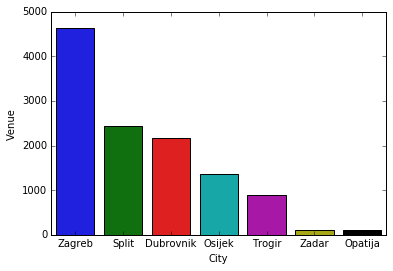

In [69]:
ax=sns.barplot(x='City', data=data1.head(7), y='Venue')

Number of unique venue categories

In [24]:
data1=data.groupby(['Venue Category']).nunique()['City'].sort_values(ascending=False)
data1[data1.values<2].index.values.shape

(83,)

In [25]:
data=data[data['Venue Category'].isin(data1[data1.values>1].index.values)]
data.shape

(13976, 8)

Maximum number of venues categories in one city

In [26]:
data.groupby(['City']).nunique()['Venue Category'].max()

208

Find only data for cities with more than 10 venues

In [27]:
tmp=data.groupby(['City']).count()['Venue']

Removing cities vith less than 10 venues

In [28]:
data=data[data['City'].isin(tmp[tmp.values>10].index.values)]
data.shape

(13599, 8)

Number of cities after removal

In [29]:
data['City'].unique().shape

(65,)

<h2> Correlation between population and number of venues</h2>

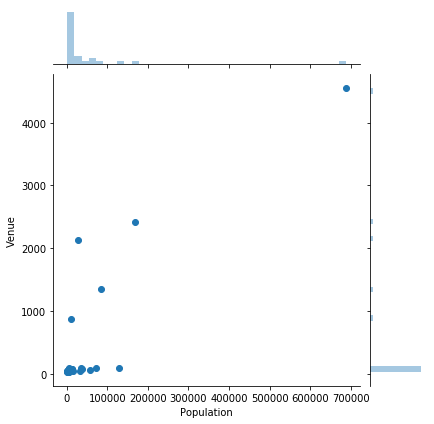

In [32]:
tmp=data.groupby(['City', 'Population']).count()['Venue'].sort_values(ascending=False).reset_index()
sns.jointplot(x='Population', y='Venue', data=tmp.head(30))

Number of venues in the city increases with the size of population in the city

<h2> Venues by categories </h2>


In [35]:
tmp=data.groupby(['Venue Category']).count()['Venue'].sort_values(ascending=False).reset_index()

Categories with the most venues

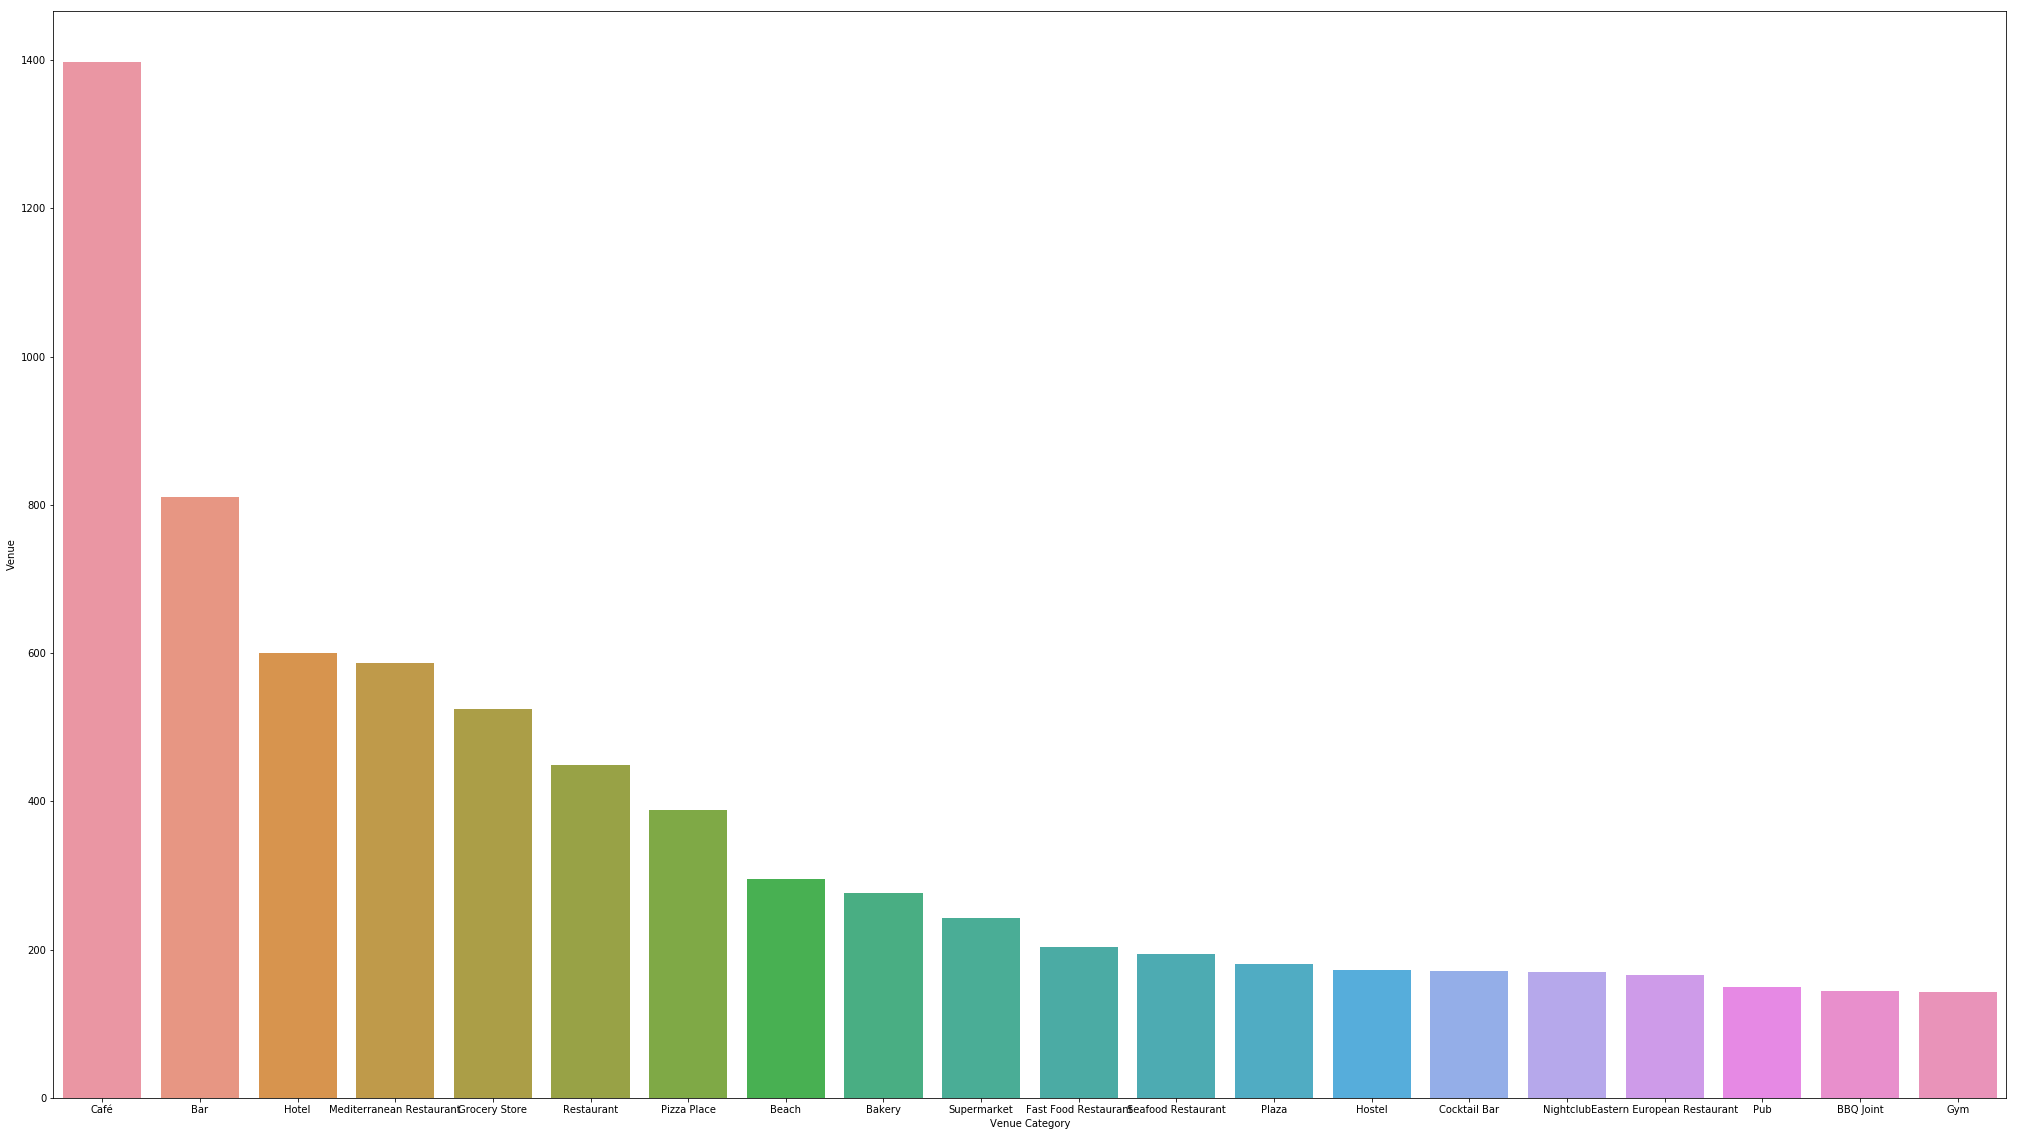

In [36]:
from matplotlib import pyplot
a = (35, 20)
fig, ax = pyplot.subplots(figsize=a)
sns.barplot(ax=ax,x='Venue Category', data=tmp.head(20), y='Venue')

Categories with the smallest number of venues

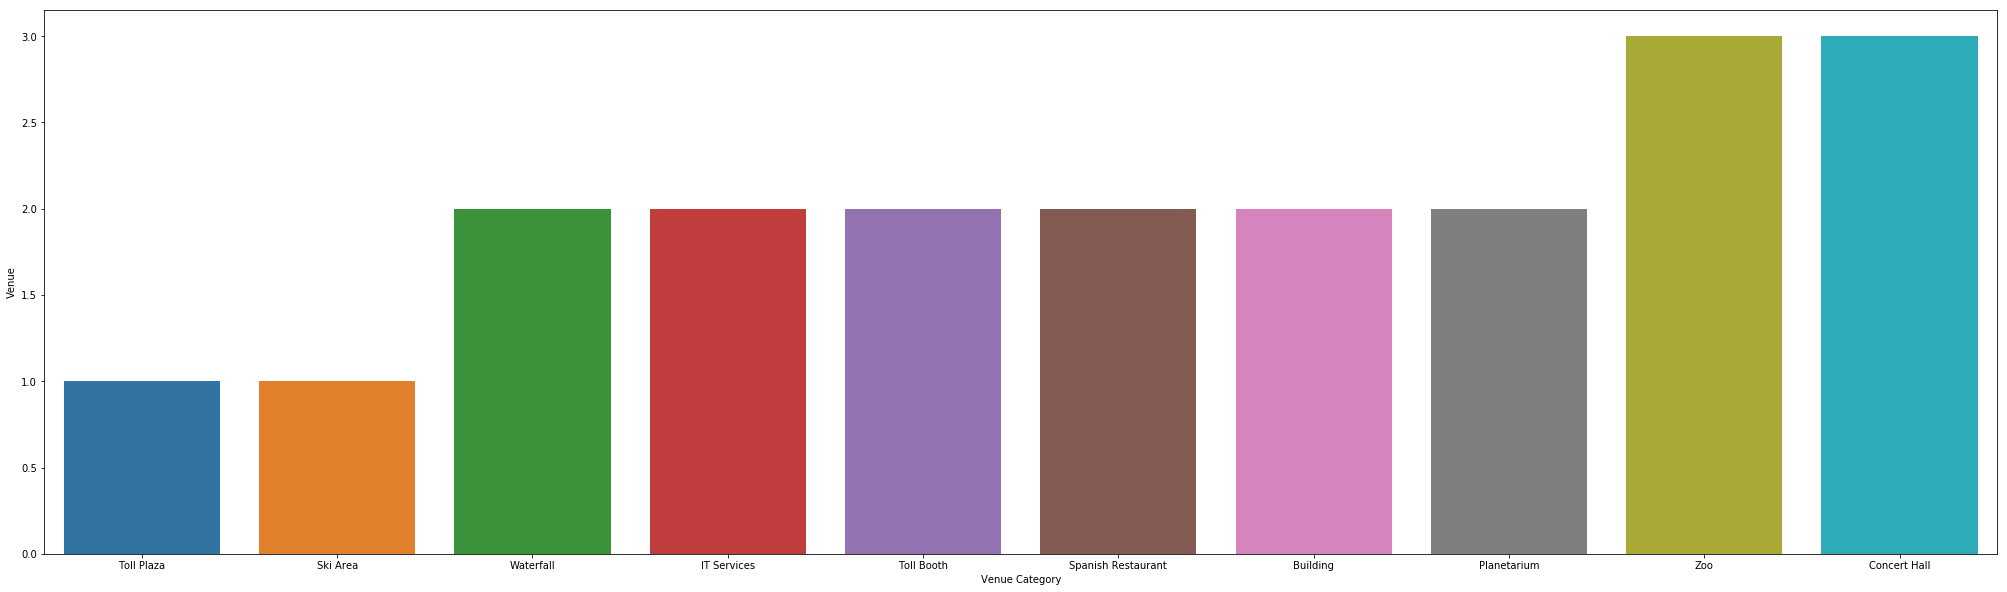

In [37]:
tmp=data.groupby(['Venue Category']).count()['Venue'].sort_values(ascending=True).reset_index()
a = (35, 10)
fig, ax = pyplot.subplots(figsize=a)
sns.barplot(ax=ax,x='Venue Category', data=tmp.head(10), y='Venue')

<h4> Reducing number of categories </h4>
Based on the previous analysis there could be a need for reducing number of categories

In [39]:
text_tmp=data.groupby(['Venue Category']).count()['Venue']<30
text_tmp


Venue Category
Accessories Store                 True
Airport                           True
Airport Lounge                    True
Airport Service                   True
Airport Terminal                  True
American Restaurant               True
Aquarium                          True
Art Gallery                      False
Art Museum                        True
Arts & Crafts Store              False
Asian Restaurant                 False
Athletics & Sports               False
Auto Garage                       True
BBQ Joint                        False
Bakery                           False
Bank                             False
Bar                              False
Basketball Court                  True
Basketball Stadium                True
Bay                               True
Beach                            False
Beach Bar                        False
Bed & Breakfast                  False
Beer Bar                          True
Beer Garden                      False
Beer Store

text_tmp shows which categories have less than 30 values

In [213]:
#!conda install -c conda-forge wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def cloud(text_tmp):
    text = ' '.join(text_tmp[text_tmp.values==True].index.values)
    wordcloud = WordCloud(
        width = 600,
        height = 600,
        background_color = 'black',
        stopwords = STOPWORDS).generate(str(text))
    fig = plt.figure(
        figsize = (20, 10),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

The procedure above creates wordcloud for joined values of all index values in data series sent as parameter

<b> Create word cloud for venues categories with less than 30 items </b>

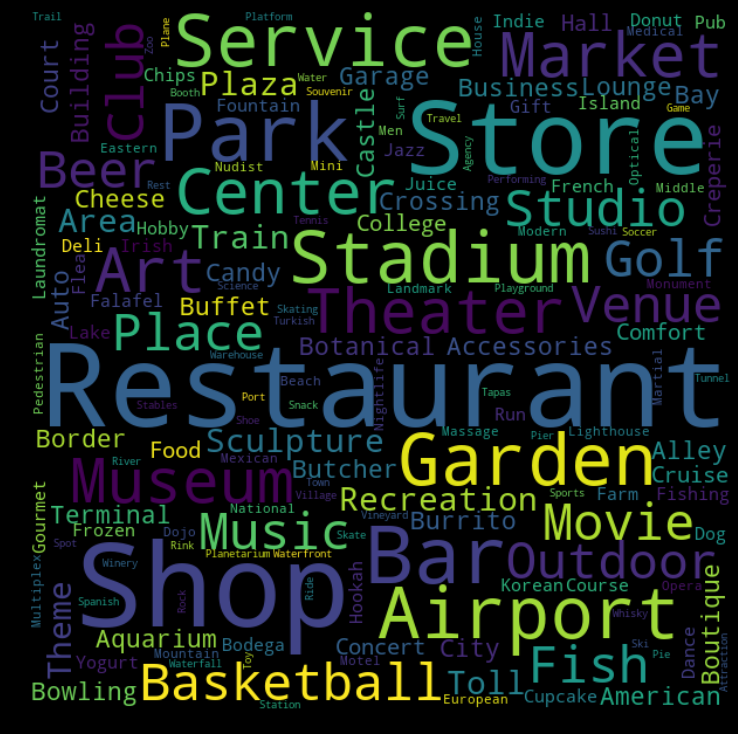

In [214]:
cloud(data.groupby(['Venue Category']).count()['Venue']<30)

Wordcloud shows some extra large words like: Shop, Bar, Restaurant, Plaza... And some extra small words like: American, European, Korean, Cupcake... Small words could be types of some large words. For example, Korean and Cupcake could be types of shop. All categories with the specific part of name like 'bar', 'shop' and number of venues less than 50 will be concatenated in one category.

<b> Concatenate categories with small number of items and similarity in one category </b>

In [40]:
data_bar=tmp[tmp['Venue Category'].str.lower().str.find('bar')>=0].set_index('Venue Category')['Venue']<50

In [41]:
data_shop=tmp[tmp['Venue Category'].str.lower().str.find('shop')>=0].set_index('Venue Category')['Venue']<50

In [42]:
data_plaza=tmp[tmp['Venue Category'].str.lower().str.find('plaza')>=0].set_index('Venue Category')['Venue']<50

In [43]:
data_theater=tmp[tmp['Venue Category'].str.lower().str.find('theater')>=0].set_index('Venue Category')['Venue']<50

In [44]:
data_museum=tmp[tmp['Venue Category'].str.lower().str.find('museum')>=0].set_index('Venue Category')['Venue']

In [45]:
data_stadium=tmp[tmp['Venue Category'].str.lower().str.find('stadium')>=0].set_index('Venue Category')['Venue']<50

In [46]:
data['category']=data['Venue Category']

In [47]:
data.loc[data['Venue Category'].isin(data_bar[data_bar.values==True].index.values), 'category']='Bar'
data.loc[data['Venue Category'].isin(data_plaza[data_plaza.values==True].index.values), 'category']='Plaza'
data.loc[data['Venue Category'].isin(data_theater[data_theater.values==True].index.values), 'category']='Theater'
data.loc[data['Venue Category'].isin(data_museum[data_museum.values==True].index.values), 'category']='Museum'
data.loc[data['Venue Category'].isin(data_stadium[data_stadium.values==True].index.values), 'category']='Stadium'

In [48]:
data=data[data['category']!='City']

<b> Repeat creating of word cloud for venues categories with less than 30 items </b>

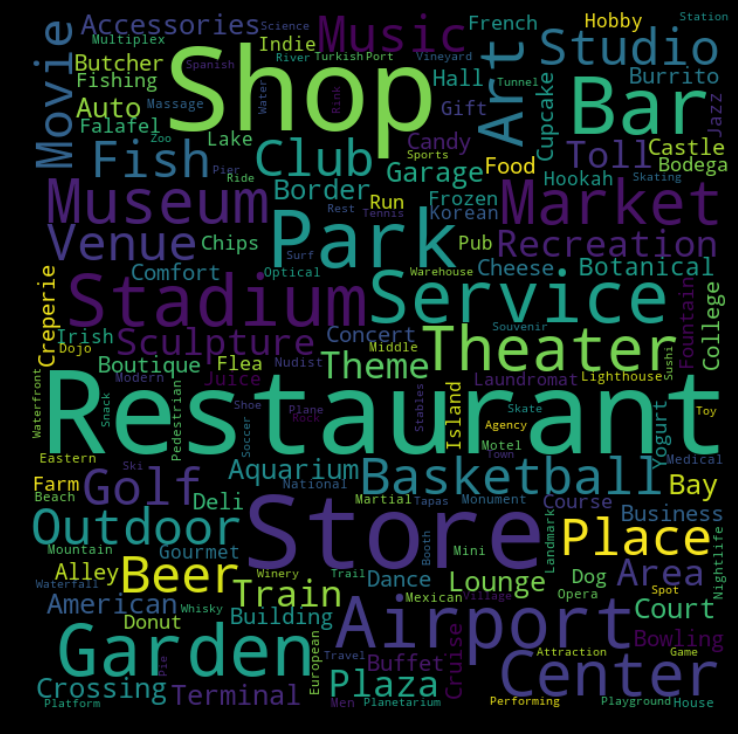

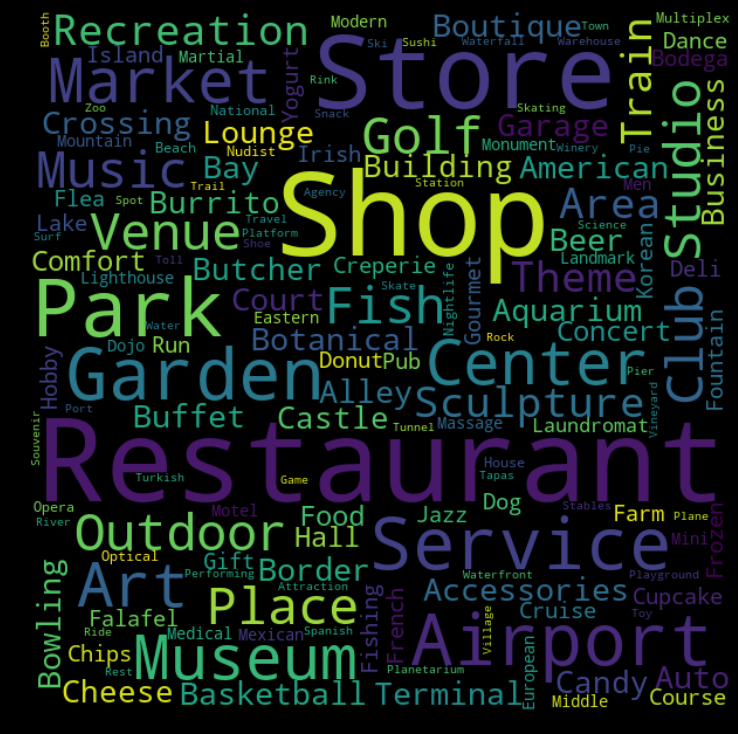

In [247]:
cloud(data.groupby(['Venue Category']).count()['Venue']<30)
cloud(data.groupby(['category']).count()['Venue']<30)

Small words are now even smaller our disappeared and big words become bigger

In [49]:
data['category'].unique().shape

(218,)

In [50]:
data['Venue Category'].unique().shape

(232,)

 For now we removed 14 categories 

<h2> Features preparation </h2>

One hot encoding of categorical values

In [52]:
one_hot=pd.get_dummies(data[['category', 'County']], prefix="", prefix_sep="")

In [53]:

one_hot['AACity']=data['City']

In [54]:
one_hot.head()
fixed_columns = [one_hot.columns[-1]] + list(one_hot.columns[:-1])
one_hot = one_hot[fixed_columns]

In [55]:
one_hot.head()

AACity  Accessories Store  Airport  Airport Lounge  Airport Service  \
0  Rijeka                  0        0               0                0   
1  Rijeka                  0        0               0                0   
2  Rijeka                  0        0               0                0   
3  Rijeka                  0        0               0                0   
4  Rijeka                  0        0               0                0   

   Airport Terminal  American Restaurant  Aquarium  Art Gallery  Art Museum  \
0                 0                    0         0            0           0   
1                 0                    0         0            0           0   
2                 0                    0         0            0           0   
3                 0                    0         0            0           0   
4                 0                    0         0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Garage  \
0                    0                 0                   0            0   
1                    0                 0                   0            0   
2                    0                 0                   0            0   
3                    0                 0                   0            0   
4                    0                 0                   0            0   

   BBQ Joint  Bakery  Bank  Bar  Basketball Court  Bay  Beach  Beach Bar  \
0          0       0     0    1                 0    0      0          0   
1          0       0     0    0                 0    0      0          0   
2          0       0     0    0                 0    0      0          0   
3          0       0     0    0                 0    0      0          0   
4          0       0     0    0                 0    0      0          0   

   Bed & Breakfast  Beer Garden  Beer Store  Bistro  Boarding House  \
0                0            0           0       0               0   
1                0            0           0       0               0   
2                0            0           0       1               0   
3                0            0           0       0               0   
4                0            0           0       0               0   

   Boat or Ferry  Bookstore  Border Crossing  Botanical Garden  Boutique  \
0              0          0                0                 0         0   
1              0          0                0                 0         0   
2              0          0                0                 0         0   
3              0          0                0                 0         0   
4              0          0                0                 0         0   

   Bowling Alley  Breakfast Spot  Brewery  Buffet  Building  Burger Joint  \
0              0               0        0       0         0             0   
1              0               0        0       0         0             0   
2              0               0        0       0         0             0   
3              0               0        0       0         0             0   
4              0               0        0       0         0             0   

   Burrito Place  Bus Line  Bus Station  Business Service  Butcher  Café  \
0              0         0            0                 0        0     0   
1              0         0            0                 0        0     0   
2              0         0            0                 0        0     0   
3              0         0            0                 0        0     0   
4              0         0            0                 0        0     0   

   Campground  Candy Store  Castle  Cheese Shop  Chinese Restaurant  Church  \
0           0            0       0            0                   0       0   
1           0            0       0            0                   0       0   
2           0            0       0            0                   0       0   
3           0            0       0         

In [56]:
one_hot.rename(columns={'AACity':'City'}, inplace=True)

Aggregating on the city level

In [57]:
data_oh=one_hot.groupby(['City']).mean().reset_index()
data_fin=data_oh#.merge(data[['City', 'Population']].drop_duplicates(), on='City')
data_fin

City  Accessories Store   Airport  Airport Lounge  \
0                Bakar           0.000000  0.000000        0.000000   
1      Biograd na Moru           0.000000  0.000000        0.000000   
2             Bjelovar           0.000000  0.000000        0.000000   
3            Buje/Buie           0.000000  0.000000        0.000000   
4           Crikvenica           0.000000  0.000000        0.000000   
5        Donja Stubica           0.000000  0.000000        0.000000   
6            Dubrovnik           0.000938  0.000000        0.000000   
7            Dugo Selo           0.000000  0.000000        0.000000   
8                 Hvar           0.000000  0.000000        0.000000   
9                 Ilok           0.000000  0.000000        0.000000   
10              Ivanec           0.000000  0.000000        0.000000   
11            Karlovac           0.000000  0.000000        0.000000   
12              Kastav           0.000000  0.000000        0.000000   
13             Klanjec           0.000000  0.000000        0.000000   
14              Komiža           0.000000  0.000000        0.000000   
15          Koprivnica           0.000000  0.000000        0.000000   
16          Kraljevica           0.000000  0.000000        0.000000   
17             Krapina           0.000000  0.000000        0.000000   
18                 Krk           0.000000  0.000000        0.000000   
19        Labin/Albona           0.000000  0.000000        0.000000   
20            Makarska           0.000000  0.000000        0.000000   
21         Mali Lošinj           0.000000  0.000000        0.000000   
22                 Nin           0.000000  0.000000        0.000000   
23             Novalja           0.000000  0.000000        0.000000   
24     Novi Vinodolski           0.000000  0.000000        0.000000   
25  Novigrad/Cittànova           0.000000  0.000000        0.000000   
26                Omiš           0.000000  0.000000        0.000000   
27             Opatija           0.000000  0.000000        0.000000   
28           Oroslavje           0.000000  0.000000        0.000000   
29              Osijek           0.000000  0.002967        0.001484   
30                 Pag           0.000000  0.000000        0.000000   
31        Pazin/Pisino           0.000000  0.000000        0.000000   
32               Ploče           0.000000  0.000000        0.000000   
33       Poreč/Parenzo           0.000000  0.000000        0.000000   
34           Pula/Pola           0.000000  0.000000        0.000000   
35                 Rab           0.000000  0.000000        0.000000   
36              Rijeka           0.000000  0.000000        0.000000   
37      Rovinj/Rovigno           0.000000  0.012048        0.000000   
38             Samobor           0.000000  0.000000        0.000000   
39                Senj           0.000000  0.000000        0.000000   
40               Sisak           0.000000  0.000000        0.000000   
41             Skradin           0.000000  0.000000        0.000000   
42      Slavonski Brod           0.000000  0.000000        0.000000   
43               Slunj           0.000000  0.000000        0.000000   
44               Solin           0.000000  0.000000        0.000000   
45               Split           0.001240  0.000000        0.000000   
46          Stari Grad           0.000000  0.000000        0.000000   
47             Supetar           0.000000  0.000000        0.000000   
48       Sveta Nedelja           0.000000  0.000000        0.000000   
49              Trogir           0.000000  0.004566        0.006849   
50          Umag/Umago           0.000000  0.000000        0.000000   
51            Varaždin           0.000000  0.000000        0.000000   
52       Velika Gorica           0.000000  0.000000        0.023256   
53            Vinkovci           0.000000  0.000000        0.000000   
54          Virovitica           0.000000  0.000000        0.000000   
55                 Vis           0.000000 

<h1> Segmentation of cities </h1>

Segmentation of the cities based on all prepared data in the dataset

In [58]:
# set number of clusters
kclusters = 4

clustering = data_fin.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100]

array([1, 3, 2, 3, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 3, 0, 1,
       3, 2, 1, 3, 0, 1, 2, 2, 3, 3, 2, 3, 3, 1, 1, 3, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 0, 3, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2],
      dtype=int32)

Insert result cluster to the dataset

In [59]:
data_fin.insert(0, 'Cluster Labels', kmeans.labels_)

In [60]:
data_fin.head()

Cluster Labels             City  Accessories Store  Airport  \
0               1            Bakar                0.0      0.0   
1               3  Biograd na Moru                0.0      0.0   
2               2         Bjelovar                0.0      0.0   
3               3        Buje/Buie                0.0      0.0   
4               1       Crikvenica                0.0      0.0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0             0.0              0.0               0.0                  0.0   
1             0.0              0.0               0.0                  0.0   
2             0.0              0.0               0.0                  0.0   
3             0.0              0.0               0.0                  0.0   
4             0.0              0.0               0.0                  0.0   

   Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0       0.0          0.0         0.0                  0.0               0.0   
1       0.0          0.0         0.0                  0.0               0.0   
2       0.0          0.0         0.0                  0.0               0.0   
3       0.0          0.0         0.0                  0.0               0.0   
4       0.0          0.0         0.0                  0.0               0.0   

   Athletics & Sports  Auto Garage  BBQ Joint  Bakery  Bank       Bar  \
0                 0.0          0.0        0.0     0.0   0.0  0.028571   
1                 0.0          0.0        0.0     0.0   0.0  0.037037   
2                 0.0          0.0        0.0     0.0   0.0  0.107143   
3                 0.0          0.0        0.0     0.0   0.0  0.000000   
4                 0.0          0.0        0.0     0.0   0.0  0.147541   

   Basketball Court  Bay     Beach  Beach Bar  Bed & Breakfast  Beer Garden  \
0          0.028571  0.0  0.057143   0.028571         0.000000          0.0   
1          0.000000  0.0  0.074074   0.000000         0.018519          0.0   
2          0.000000  0.0  0.000000   0.000000         0.000000          0.0   
3          0.000000  0.0  0.000000   0.000000         0.000000          0.0   
4          0.000000  0.0  0.114754   0.016393         0.000000          0.0   

   Beer Store    Bistro  Boarding House  Boat or Ferry  Bookstore  \
0         0.0  0.000000             0.0            0.0        0.0   
1         0.0  0.000000             0.0            0.0        0.0   
2         0.0  0.000000             0.0            0.0        0.0   
3         0.0  0.000000             0.0            0.0        0.0   
4         0.0  0.016393             0.0            0.0        0.0   

   Border Crossing  Botanical Garden  Boutique  Bowling Alley  Breakfast Spot  \
0              0.0               0.0       0.0            0.0        0.000000   
1              0.0               0.0       0.0            0.0        0.018519   
2              0.0               0.0       0.0            0.0        0.000000   
3              0.0               0.0       0.0            0.0        0.000000   
4              0.0               0.0       0.0            0.0        0.000000   

    Brewery    Buffet  Building  Burger Joint  Burrito Place  Bus Line  \
0  0.028571  0.000000       0.0           0.0            0.0       0.0   
1  0.000000  0.018519       0.0           0.0            0.0       0.0   
2  0.000000  0.000000       0.0           0.0            0.0       0.0   
3  0.052632  0.000000       0.0           0.0            0.0       0.0   
4  0.000000  0.000000       0.0           0.0            0.0       0.0   

   Bus Station  Business Service  Butcher      Café  Campground  Candy Store  \
0          0.0               0.0      0.0  0.114286    0.028571          0.0   
1          0.0               0.0      0.0  0.055556    0.018519          0.0   
2          0.0               0.0      0.0  0.107143    0.000000          0.0   
3          0.0               0.0      0.0  0.000000    0.000000          0.0   
4      

In [62]:
data_cluster=data[['City', 'Longitude', 'Latitude']].drop_duplicates().merge(data_fin[['City', 'Cluster Labels']], on=['City'])

Results of clustering

In [63]:
data_cluster

City  Longitude   Latitude  Cluster Labels
0               Rijeka  14.440984  45.326936               1
1                Zadar  15.232136  44.118608               3
2        Velika Gorica  16.068748  45.715071               2
3       Slavonski Brod  18.012130  45.165621               2
4            Pula/Pola  13.845541  44.870197               3
5             Karlovac  15.548630  45.489252               2
6                Sisak  16.375482  45.488830               2
7             Varaždin  16.337790  46.308029               2
8              Šibenik  15.896484  43.733706               2
9             Bjelovar  16.842203  45.898670               2
10             Samobor  15.710909  45.802031               2
11            Vinkovci  18.804708  45.288320               2
12          Koprivnica  16.831916  46.162944               2
13              Đakovo  18.410494  45.309700               2
14             Vukovar  19.002113  45.344543               2
15             Čakovec  16.434683  46.387768               2
16            Zaprešić  15.804681  45.857448               2
17               Solin  16.491921  43.544159               0
18          Virovitica  17.385306  45.833183               2
19       Sveta Nedelja  15.777641  45.796859               2
20           Dugo Selo  16.237771  45.806039               2
21       Poreč/Parenzo  13.595694  45.227383               3
22                Omiš  16.691289  43.444693               0
23      Rovinj/Rovigno  13.642402  45.080975               3
24            Makarska  17.016516  43.296067               0
25              Ivanec  16.124454  46.223983               2
26          Umag/Umago  13.522410  45.432359               3
27             Krapina  15.871113  46.162803               2
28             Opatija  14.302954  45.332782               1
29        Labin/Albona  14.123193  45.094851               3
30          Crikvenica  14.692791  45.173705               1
31              Kastav  14.348229  45.373376               1
32               Ploče  17.436038  43.053374               2
33               Zabok  15.903825  46.026330               2
34              Vodice  15.778808  43.760220               2
35        Pazin/Pisino  13.934966  45.238784               3
36               Bakar  14.537583  45.307147               1
37         Mali Lošinj  14.469420  44.531663               1
38                 Rab  14.734660  44.775689               1
39                Senj  14.903056  44.989733               2
40                Ilok  19.376979  45.221325               2
41                 Krk  14.549668  45.090195               1
42           Oroslavje  15.914050  45.996250               2
43       Donja Stubica  15.970376  45.980465               2
44     Biograd na Moru  15.445730  43.936807               3
45           Buje/Buie  13.659136  45.408365               3
46     Novi Vinodolski  14.791407  45.127004               1
47               Slunj  15.585326  45.115676               2
48          Kraljevica  14.570272  45.273634               1
49  Novigrad/Cittànova  13.564945  45.316851               3
50                Hvar  16.556472  43.173981               0
51             Supetar  16.553211  43.382583               0
52                 Pag  14.946185  44.496610               3
53             Skradin  15.923372  43.817866               2
54             Novalja  14.884472  44.556117               2
55             Klanjec  15.743815  46.050790               2
56          Stari Grad  16.597655  43.184153               0
57                 Nin  15.184026  44.243074               3
58                 Vis  16.165473  43.043421               0
59              Komiža  16.090797  43.044531               0
60              Zagreb  15.977048  45.813177               2
61               Split  16.441423  43.507303               0
62              Osijek  18.695408  45.554889               2
63           Dubrovnik  18.093695  42.649964               2
64              Trogir  16.249972  43.516687         

In [65]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data_cluster['Latitude'], data_cluster['Longitude'], data_cluster['City'], data_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Clusters are showing 4 regions which are overlapping with geographical regions: North Croatia, Istria, Lika and Dalmatia. First model shot very well.

<b>Let's try different number of cluster</b>

In [68]:
tmp_data=data_fin.drop(columns=['Cluster Labels'], axis=1)

In [69]:
tmp_data.head()

City  Accessories Store  Airport  Airport Lounge  \
0            Bakar                0.0      0.0             0.0   
1  Biograd na Moru                0.0      0.0             0.0   
2         Bjelovar                0.0      0.0             0.0   
3        Buje/Buie                0.0      0.0             0.0   
4       Crikvenica                0.0      0.0             0.0   

   Airport Service  Airport Terminal  American Restaurant  Aquarium  \
0              0.0               0.0                  0.0       0.0   
1              0.0               0.0                  0.0       0.0   
2              0.0               0.0                  0.0       0.0   
3              0.0               0.0                  0.0       0.0   
4              0.0               0.0                  0.0       0.0   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0          0.0         0.0                  0.0               0.0   
1          0.0         0.0                  0.0               0.0   
2          0.0         0.0                  0.0               0.0   
3          0.0         0.0                  0.0               0.0   
4          0.0         0.0                  0.0               0.0   

   Athletics & Sports  Auto Garage  BBQ Joint  Bakery  Bank       Bar  \
0                 0.0          0.0        0.0     0.0   0.0  0.028571   
1                 0.0          0.0        0.0     0.0   0.0  0.037037   
2                 0.0          0.0        0.0     0.0   0.0  0.107143   
3                 0.0          0.0        0.0     0.0   0.0  0.000000   
4                 0.0          0.0        0.0     0.0   0.0  0.147541   

   Basketball Court  Bay     Beach  Beach Bar  Bed & Breakfast  Beer Garden  \
0          0.028571  0.0  0.057143   0.028571         0.000000          0.0   
1          0.000000  0.0  0.074074   0.000000         0.018519          0.0   
2          0.000000  0.0  0.000000   0.000000         0.000000          0.0   
3          0.000000  0.0  0.000000   0.000000         0.000000          0.0   
4          0.000000  0.0  0.114754   0.016393         0.000000          0.0   

   Beer Store    Bistro  Boarding House  Boat or Ferry  Bookstore  \
0         0.0  0.000000             0.0            0.0        0.0   
1         0.0  0.000000             0.0            0.0        0.0   
2         0.0  0.000000             0.0            0.0        0.0   
3         0.0  0.000000             0.0            0.0        0.0   
4         0.0  0.016393             0.0            0.0        0.0   

   Border Crossing  Botanical Garden  Boutique  Bowling Alley  Breakfast Spot  \
0              0.0               0.0       0.0            0.0        0.000000   
1              0.0               0.0       0.0            0.0        0.018519   
2              0.0               0.0       0.0            0.0        0.000000   
3              0.0               0.0       0.0            0.0        0.000000   
4              0.0               0.0       0.0            0.0        0.000000   

    Brewery    Buffet  Building  Burger Joint  Burrito Place  Bus Line  \
0  0.028571  0.000000       0.0           0.0            0.0       0.0   
1  0.000000  0.018519       0.0           0.0            0.0       0.0   
2  0.000000  0.000000       0.0           0.0            0.0       0.0   
3  0.052632  0.000000       0.0           0.0            0.0       0.0   
4  0.000000  0.000000       0.0           0.0            0.0       0.0   

   Bus Station  Business Service  Butcher      Café  Campground  Candy Store  \
0          0.0               0.0      0.0  0.114286    0.028571          0.0   
1          0.0               0.0      0.0  0.055556    0.018519          0.0   
2          0.0               0.0      0.0  0.107143    0.000000          0.0   
3          0.0               0.0      0.0  0.000000    0.000000          0.0   
4          0.0               0.0      0.0  0.114754    0.016393          0.0   

   Castle  Cheese Shop  Chinese R

In [70]:
# set number of clusters
kclusters = 5

clustering1 = tmp_data.drop('City', 1)

# run k-means clustering
kmeans1 = KMeans(n_clusters=kclusters, random_state=0).fit(clustering1)

# check cluster labels generated for each row in the dataframe
kmeans1.labels_[0:100]

array([2, 0, 0, 0, 2, 3, 0, 4, 1, 0, 0, 0, 2, 3, 1, 0, 2, 3, 2, 0, 1, 2,
       0, 0, 2, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 2, 2, 0, 4, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 4, 1, 0, 0, 4, 0, 0, 1, 0, 0, 3, 0, 0, 4, 0, 0, 0],
      dtype=int32)

In [71]:
tmp_data.insert(0, 'Cluster Labels', kmeans1.labels_)

In [72]:
tmp_data.reset_index(inplace=True)

In [73]:
data_cluster1=data[['City', 'Longitude', 'Latitude']].drop_duplicates().merge(tmp_data[['City', 'Cluster Labels']], on=['City'])

In [80]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data_cluster1['Latitude'], data_cluster1['Longitude'], data_cluster1['City'], data_cluster1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

With more clusters we are gwtting some specific areas of Croatia like Hrvatsko Zagorje

In [81]:
tmp_data.head()

index  Cluster Labels             City  Accessories Store  Airport  \
0      0               2            Bakar                0.0      0.0   
1      1               0  Biograd na Moru                0.0      0.0   
2      2               0         Bjelovar                0.0      0.0   
3      3               0        Buje/Buie                0.0      0.0   
4      4               2       Crikvenica                0.0      0.0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0             0.0              0.0               0.0                  0.0   
1             0.0              0.0               0.0                  0.0   
2             0.0              0.0               0.0                  0.0   
3             0.0              0.0               0.0                  0.0   
4             0.0              0.0               0.0                  0.0   

   Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0       0.0          0.0         0.0                  0.0               0.0   
1       0.0          0.0         0.0                  0.0               0.0   
2       0.0          0.0         0.0                  0.0               0.0   
3       0.0          0.0         0.0                  0.0               0.0   
4       0.0          0.0         0.0                  0.0               0.0   

   Athletics & Sports  Auto Garage  BBQ Joint  Bakery  Bank       Bar  \
0                 0.0          0.0        0.0     0.0   0.0  0.028571   
1                 0.0          0.0        0.0     0.0   0.0  0.037037   
2                 0.0          0.0        0.0     0.0   0.0  0.107143   
3                 0.0          0.0        0.0     0.0   0.0  0.000000   
4                 0.0          0.0        0.0     0.0   0.0  0.147541   

   Basketball Court  Bay     Beach  Beach Bar  Bed & Breakfast  Beer Garden  \
0          0.028571  0.0  0.057143   0.028571         0.000000          0.0   
1          0.000000  0.0  0.074074   0.000000         0.018519          0.0   
2          0.000000  0.0  0.000000   0.000000         0.000000          0.0   
3          0.000000  0.0  0.000000   0.000000         0.000000          0.0   
4          0.000000  0.0  0.114754   0.016393         0.000000          0.0   

   Beer Store    Bistro  Boarding House  Boat or Ferry  Bookstore  \
0         0.0  0.000000             0.0            0.0        0.0   
1         0.0  0.000000             0.0            0.0        0.0   
2         0.0  0.000000             0.0            0.0        0.0   
3         0.0  0.000000             0.0            0.0        0.0   
4         0.0  0.016393             0.0            0.0        0.0   

   Border Crossing  Botanical Garden  Boutique  Bowling Alley  Breakfast Spot  \
0              0.0               0.0       0.0            0.0        0.000000   
1              0.0               0.0       0.0            0.0        0.018519   
2              0.0               0.0       0.0            0.0        0.000000   
3              0.0               0.0       0.0            0.0        0.000000   
4              0.0               0.0       0.0            0.0        0.000000   

    Brewery    Buffet  Building  Burger Joint  Burrito Place  Bus Line  \
0  0.028571  0.000000       0.0           0.0            0.0       0.0   
1  0.000000  0.018519       0.0           0.0            0.0       0.0   
2  0.000000  0.000000       0.0           0.0            0.0       0.0   
3  0.052632  0.000000       0.0           0.0            0.0       0.0   
4  0.000000  0.000000       0.0           0.0            0.0       0.0   

   Bus Station  Business Service  Butcher      Café  Campground  Candy Store  \
0          0.0               0.0      0.0  0.114286    0.028571          0.0   
1          0.0               0.0      0.0  0.055556    0.018519          0.0   
2          0.0               0.0      0.0  0.107143    0.000000          0.0   
3          0.0               0.0      0.0  0.

<b> Attractive venues clustering </b>
Let's try to make clustering based on some venues which are characteristic for tourists

Dataset with only touristic specific venues like: Hotels, motels, bars, pubs, restaurants...

In [82]:
restaurant_data=tmp_data.loc[:, ((tmp_data.columns.str.find('Restaurant')>-1) | (tmp_data.columns.str.find('City')==0)|(tmp_data.columns.str.find('Bar')>-1)|(tmp_data.columns.str.find('Hotel')>-1)|(tmp_data.columns.str.find('Motel')>-1)|(tmp_data.columns.str.find('Buffet')>-1)|(tmp_data.columns.str.find('Bistro')>-1)|(tmp_data.columns.str.find('Pub')>-1)|(tmp_data.columns.str.find('Beach')>-1))]

In [83]:
restaurant_data

City  American Restaurant  Asian Restaurant       Bar  \
0                Bakar             0.000000          0.000000  0.028571   
1      Biograd na Moru             0.000000          0.000000  0.037037   
2             Bjelovar             0.000000          0.000000  0.107143   
3            Buje/Buie             0.000000          0.000000  0.000000   
4           Crikvenica             0.000000          0.000000  0.147541   
5        Donja Stubica             0.000000          0.000000  0.000000   
6            Dubrovnik             0.001407          0.000938  0.077392   
7            Dugo Selo             0.000000          0.000000  0.000000   
8                 Hvar             0.000000          0.000000  0.028571   
9                 Ilok             0.000000          0.000000  0.266667   
10              Ivanec             0.000000          0.000000  0.090909   
11            Karlovac             0.000000          0.000000  0.064516   
12              Kastav             0.000000          0.000000  0.109589   
13             Klanjec             0.000000          0.000000  0.076923   
14              Komiža             0.000000          0.000000  0.100000   
15          Koprivnica             0.000000          0.000000  0.296296   
16          Kraljevica             0.000000          0.000000  0.058824   
17             Krapina             0.000000          0.000000  0.076923   
18                 Krk             0.000000          0.000000  0.057143   
19        Labin/Albona             0.000000          0.000000  0.058824   
20            Makarska             0.000000          0.000000  0.071429   
21         Mali Lošinj             0.000000          0.000000  0.055556   
22                 Nin             0.000000          0.000000  0.068966   
23             Novalja             0.000000          0.000000  0.068966   
24     Novi Vinodolski             0.000000          0.000000  0.083333   
25  Novigrad/Cittànova             0.000000          0.000000  0.087719   
26                Omiš             0.000000          0.000000  0.028571   
27             Opatija             0.000000          0.000000  0.081633   
28           Oroslavje             0.000000          0.000000  0.038462   
29              Osijek             0.000000          0.000000  0.077151   
30                 Pag             0.000000          0.000000  0.066667   
31        Pazin/Pisino             0.000000          0.000000  0.153846   
32               Ploče             0.000000          0.000000  0.066667   
33       Poreč/Parenzo             0.000000          0.000000  0.064516   
34           Pula/Pola             0.000000          0.000000  0.115942   
35                 Rab             0.000000          0.000000  0.028571   
36              Rijeka             0.000000          0.000000  0.117021   
37      Rovinj/Rovigno             0.000000          0.000000  0.012048   
38             Samobor             0.000000          0.000000  0.080000   
39                Senj             0.000000          0.000000  0.040000   
40               Sisak             0.000000          0.000000  0.086957   
41             Skradin             0.000000          0.000000  0.000000   
42      Slavonski Brod             0.000000          0.000000  0.136364   
43               Slunj             0.000000          0.000000  0.105263   
44               Solin             0.000000          0.000000  0.041667   
45               Split             0.000826          0.006198  0.078512   
46          Stari Grad             0.000000          0.000000  0.033333   
47             Supetar             0.000000          0.000000  0.103448   
48       Sveta Nedelja             0.000000          0.000000  0.023256   
49              Trogir             0.001142          0.000000  0.054795   
50          Umag/Umago             0.000000          0.000000  0.083333   
51            Varaždin             0.000000          0.000000  0.180556   
52       Velika Gorica             0.000000

In [84]:
# set number of clusters
kclusters = 4

clustering2 = restaurant_data.iloc[:,1:]

# run k-means clustering
kmeans2 = KMeans(n_clusters=kclusters, random_state=0).fit(clustering2)

# check cluster labels generated for each row in the dataframe
kmeans2.labels_[0:100]

array([0, 0, 3, 0, 0, 3, 0, 3, 0, 2, 3, 3, 3, 3, 0, 2, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 1, 0, 2, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3,
       3, 3, 0, 0, 3, 0, 0, 2, 3, 3, 3, 0, 0, 2, 3, 0, 3, 2, 2, 1, 0],
      dtype=int32)

In [85]:
restaurant_data.insert(0, 'Cluster Labels', kmeans2.labels_)

In [86]:
data_cluster2=data[['City', 'Longitude', 'Latitude']].drop_duplicates().merge(restaurant_data[['City', 'Cluster Labels']], on=['City'])

In [88]:

# create map
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data_cluster2['Latitude'], data_cluster2['Longitude'], data_cluster2['City'], data_cluster2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters2

In [89]:
data_cluster2

City  Longitude   Latitude  Cluster Labels
0               Rijeka  14.440984  45.326936               3
1                Zadar  15.232136  44.118608               0
2        Velika Gorica  16.068748  45.715071               3
3       Slavonski Brod  18.012130  45.165621               3
4            Pula/Pola  13.845541  44.870197               0
5             Karlovac  15.548630  45.489252               3
6                Sisak  16.375482  45.488830               3
7             Varaždin  16.337790  46.308029               2
8              Šibenik  15.896484  43.733706               0
9             Bjelovar  16.842203  45.898670               3
10             Samobor  15.710909  45.802031               3
11            Vinkovci  18.804708  45.288320               3
12          Koprivnica  16.831916  46.162944               2
13              Đakovo  18.410494  45.309700               1
14             Vukovar  19.002113  45.344543               2
15             Čakovec  16.434683  46.387768               2
16            Zaprešić  15.804681  45.857448               2
17               Solin  16.491921  43.544159               3
18          Virovitica  17.385306  45.833183               3
19       Sveta Nedelja  15.777641  45.796859               3
20           Dugo Selo  16.237771  45.806039               3
21       Poreč/Parenzo  13.595694  45.227383               0
22                Omiš  16.691289  43.444693               0
23      Rovinj/Rovigno  13.642402  45.080975               0
24            Makarska  17.016516  43.296067               0
25              Ivanec  16.124454  46.223983               3
26          Umag/Umago  13.522410  45.432359               0
27             Krapina  15.871113  46.162803               3
28             Opatija  14.302954  45.332782               0
29        Labin/Albona  14.123193  45.094851               0
30          Crikvenica  14.692791  45.173705               0
31              Kastav  14.348229  45.373376               3
32               Ploče  17.436038  43.053374               3
33               Zabok  15.903825  46.026330               3
34              Vodice  15.778808  43.760220               0
35        Pazin/Pisino  13.934966  45.238784               2
36               Bakar  14.537583  45.307147               0
37         Mali Lošinj  14.469420  44.531663               0
38                 Rab  14.734660  44.775689               0
39                Senj  14.903056  44.989733               0
40                Ilok  19.376979  45.221325               2
41                 Krk  14.549668  45.090195               0
42           Oroslavje  15.914050  45.996250               3
43       Donja Stubica  15.970376  45.980465               3
44     Biograd na Moru  15.445730  43.936807               0
45           Buje/Buie  13.659136  45.408365               0
46     Novi Vinodolski  14.791407  45.127004               0
47               Slunj  15.585326  45.115676               3
48          Kraljevica  14.570272  45.273634               0
49  Novigrad/Cittànova  13.564945  45.316851               0
50                Hvar  16.556472  43.173981               0
51             Supetar  16.553211  43.382583               0
52                 Pag  14.946185  44.496610               0
53             Skradin  15.923372  43.817866               0
54             Novalja  14.884472  44.556117               0
55             Klanjec  15.743815  46.050790               3
56          Stari Grad  16.597655  43.184153               0
57                 Nin  15.184026  44.243074               0
58                 Vis  16.165473  43.043421               0
59              Komiža  16.090797  43.044531               0
60              Zagreb  15.977048  45.813177               3
61               Split  16.441423  43.507303               3
62              Osijek  18.695408  45.554889               1
63           Dubrovnik  18.093695  42.649964               0
64              Trogir  16.249972  43.516687         

In [90]:
restaurant_data

Cluster Labels                City  American Restaurant  Asian Restaurant  \
0                0               Bakar             0.000000          0.000000   
1                0     Biograd na Moru             0.000000          0.000000   
2                3            Bjelovar             0.000000          0.000000   
3                0           Buje/Buie             0.000000          0.000000   
4                0          Crikvenica             0.000000          0.000000   
5                3       Donja Stubica             0.000000          0.000000   
6                0           Dubrovnik             0.001407          0.000938   
7                3           Dugo Selo             0.000000          0.000000   
8                0                Hvar             0.000000          0.000000   
9                2                Ilok             0.000000          0.000000   
10               3              Ivanec             0.000000          0.000000   
11               3            Karlovac             0.000000          0.000000   
12               3              Kastav             0.000000          0.000000   
13               3             Klanjec             0.000000          0.000000   
14               0              Komiža             0.000000          0.000000   
15               2          Koprivnica             0.000000          0.000000   
16               0          Kraljevica             0.000000          0.000000   
17               3             Krapina             0.000000          0.000000   
18               0                 Krk             0.000000          0.000000   
19               0        Labin/Albona             0.000000          0.000000   
20               0            Makarska             0.000000          0.000000   
21               0         Mali Lošinj             0.000000          0.000000   
22               0                 Nin             0.000000          0.000000   
23               0             Novalja             0.000000          0.000000   
24               0     Novi Vinodolski             0.000000          0.000000   
25               0  Novigrad/Cittànova             0.000000          0.000000   
26               0                Omiš             0.000000          0.000000   
27               0             Opatija             0.000000          0.000000   
28               3           Oroslavje             0.000000          0.000000   
29               1              Osijek             0.000000          0.000000   
30               0                 Pag             0.000000          0.000000   
31               2        Pazin/Pisino             0.000000          0.000000   
32               3               Ploče             0.000000          0.000000   
33               0       Poreč/Parenzo             0.000000          0.000000   
34               0           Pula/Pola             0.000000          0.000000   
35               0                 Rab             0.000000          0.000000   
36               3              Rijeka             0.000000          0.000000   
37               0      Rovinj/Rovigno             0.000000          0.000000   
38               3             Samobor             0.000000          0.000000   
39               0                Senj             0.000000          0.000000   
40               3               Sisak             0.000000          0.000000   
41               0             Skradin             0.000000          0.000000   
42               3      Slavonski Brod             0.000000          0.000000   
43               3               Slunj             0.000000          0.000000   
44               3               Solin             0.000000          0.000000   
45               3               Split             0.000826          0.006198   
46               0          Stari Grad             0.000000          0.000000   
47               0             Supetar             0.000000          0.000000   
48               3       Sveta Nede

<b> Analysis of clusters </b>


Beaches by clusters

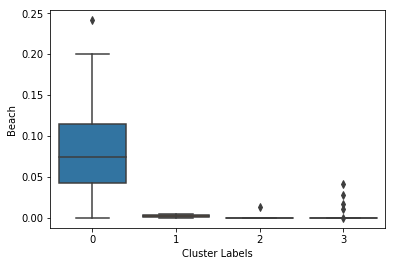

In [91]:
sns.boxplot(y='Beach', x='Cluster Labels', data=restaurant_data)

Based on the graph above, 0 cluster are cities with beaches and they are cities on the Adriatic sea. Cluster 1, 2 and 3 are continantal clusters, but in cluster 3 are some cities with beaches on the lakes and rivers. 

Bars by clusters

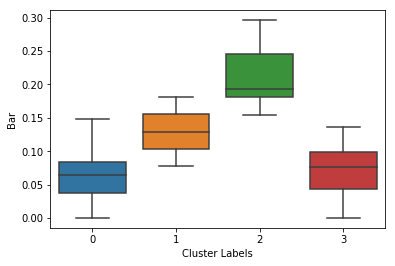

In [92]:
sns.boxplot(y='Bar', x='Cluster Labels', data=restaurant_data)

Cluser 2 is above all other clusters in number of bars. Cluster 2 is continental region of Croatia with a culture of drinking and there is culture of drinking very common. 

Pubs in Croatia

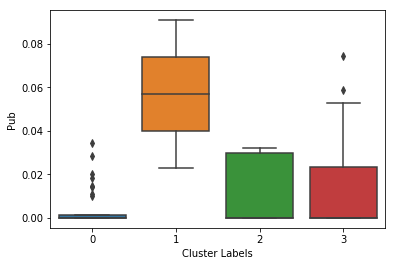

In [176]:
sns.boxplot(y='Pub', x='Cluster Labels', data=restaurant_data)

Cluster 1 has a lot of pubs. This is small region with only 2 cities in east part of Croatia. Clusters 1,2 and 3 are in parts of Croatia where are some beer industries and pubs are popular places. In region on the adriatic sea people drinks a lot of coffee and their bars and pubs are places which are manly open through the summer season. 

Mediterranean restaurants by clusters

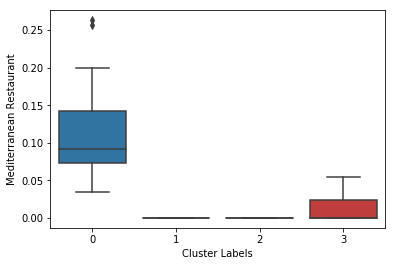

In [177]:
sns.boxplot(y='Mediterranean Restaurant', x='Cluster Labels', data=restaurant_data)

The most of Mediterranean restaurants are in cluster 0 and there are some in cluster 3. This confirms that cluster 0 is region of Croatia with a lot of sea, beaches and sea food. Cluster 3 has some large cities with many different restaurants. For mediterranean restaurant lovers great place could be any big city in Croatia or any city on the seaside. 

<h2> Classification </h2>
<h3> Has some city specific type of restaurant? </h3>

We will try to predict has some city Mediterranean restaurant or not, based on touristic attractive dataset

In [8]:
df=tmp_data.loc[:, ((tmp_data.columns.str.find('Restaurant')>-1) | (tmp_data.columns.str.find('City')==0)|(tmp_data.columns.str.find('Bar')>-1)|(tmp_data.columns.str.find('Hotel')>-1)|(tmp_data.columns.str.find('Motel')>-1)|(tmp_data.columns.str.find('Buffet')>-1)|(tmp_data.columns.str.find('Bistro')>-1)|(tmp_data.columns.str.find('Pub')>-1)|(tmp_data.columns.str.find('Beach')>-1))]

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

Create target variable

In [10]:
df['y']=df['Mediterranean Restaurant']
df.loc[df['Mediterranean Restaurant']>0, 'y']=1

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
y=df['y']
X=df.drop(columns=['y', 'Mediterranean Restaurant', 'City'])

In [12]:
y

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     0.0
6     1.0
7     0.0
8     1.0
9     0.0
10    0.0
11    1.0
12    1.0
13    0.0
14    1.0
15    0.0
16    1.0
17    0.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    0.0
29    0.0
     ... 
35    1.0
36    1.0
37    1.0
38    0.0
39    1.0
40    0.0
41    1.0
42    0.0
43    0.0
44    1.0
45    1.0
46    1.0
47    1.0
48    0.0
49    1.0
50    1.0
51    0.0
52    0.0
53    0.0
54    0.0
55    1.0
56    1.0
57    0.0
58    0.0
59    1.0
60    1.0
61    0.0
62    0.0
63    0.0
64    1.0
Name: y, Length: 65, dtype: float64

Train test split of dataset 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

<h3> Random Forest Classifier </h3>

In [47]:
from sklearn.ensemble import RandomForestClassifier

Create classifier with 250 estimators

In [48]:
rf=RandomForestClassifier(n_estimators=250)

Train model on training data

In [49]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
y_pred=rf.predict(X_test)

Score model

In [51]:
rf.score(X_test, y_test)

0.9230769230769231

In [52]:
from sklearn.metrics import confusion_matrix

Create confusion matrix

In [53]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

0   1
0  9   0
1  2  15

Jaccard score

In [54]:
from  sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_pred)

0.9230769230769231

F1 score

In [55]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9375

<h3> SVM </h3>

In [56]:
from sklearn import svm

In [57]:
svc=svm.SVC()

Train model on training data

In [58]:
svc.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [59]:
y_pred=svc.predict(X_test)

Create confusion matrix

In [60]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

0   1
0  0   9
1  0  17

F1 score

In [61]:

f1_score(y_test, y_pred)

0.7906976744186047

Jaccard score

In [62]:
from  sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_pred)

0.6538461538461539